[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


            Crude Oil  10Y Treasury ETF   EUR/USD      S&P 500
Date                                                          
2019-01-02  54.910000         90.553802  1.146171  2510.030029
2019-01-03  55.950001         91.273621  1.131811  2447.889893
2019-01-04  57.060001         90.536453  1.139108  2531.939941
2019-01-07  57.330002         90.285011  1.141044  2549.689941
2019-01-08  58.720001         90.059494  1.147974  2574.409912


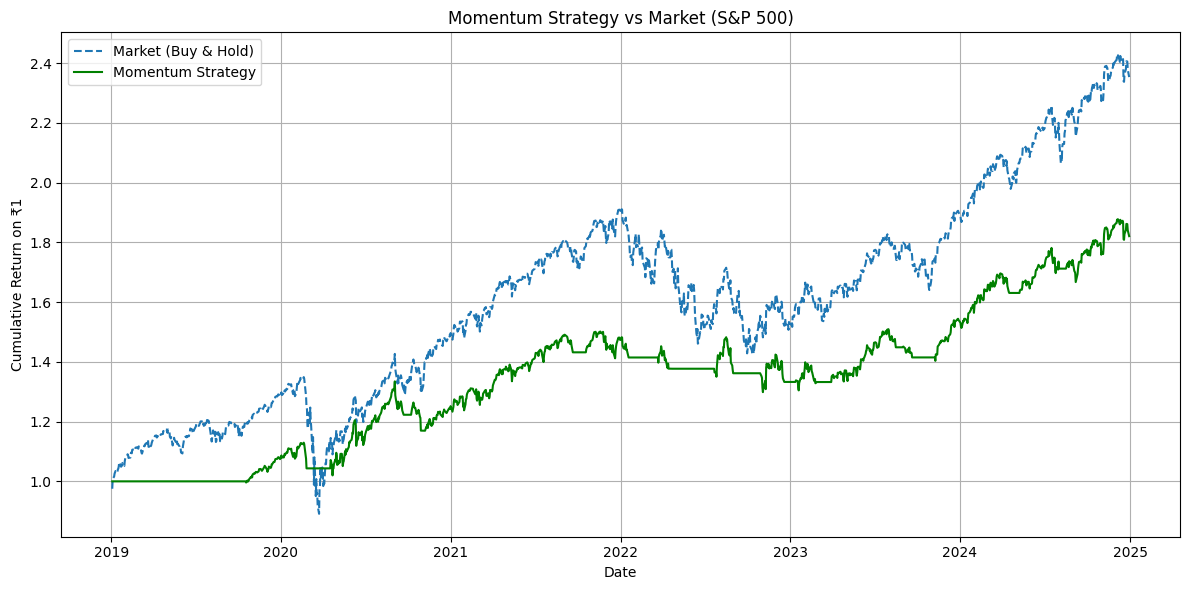

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


 Sharpe Ratio: 0.91
 Max Drawdown: -13.51%
 Strategy Final Return: 1.82x
 Market Final Return: 2.35x

=== Evaluating S&P 500 ===
📈 Sharpe Ratio: 0.91
📉 Max Drawdown: -13.51%
💰 Final Return: 1.82x

=== Evaluating Crude Oil ===
📈 Sharpe Ratio: 0.32
📉 Max Drawdown: -57.58%
💰 Final Return: 1.33x

=== Evaluating 10Y Treasury ETF ===
📈 Sharpe Ratio: 0.14
📉 Max Drawdown: -11.81%
💰 Final Return: 1.04x

=== Evaluating EUR/USD ===


📈 Sharpe Ratio: 0.00
📉 Max Drawdown: -12.66%
💰 Final Return: 0.99x


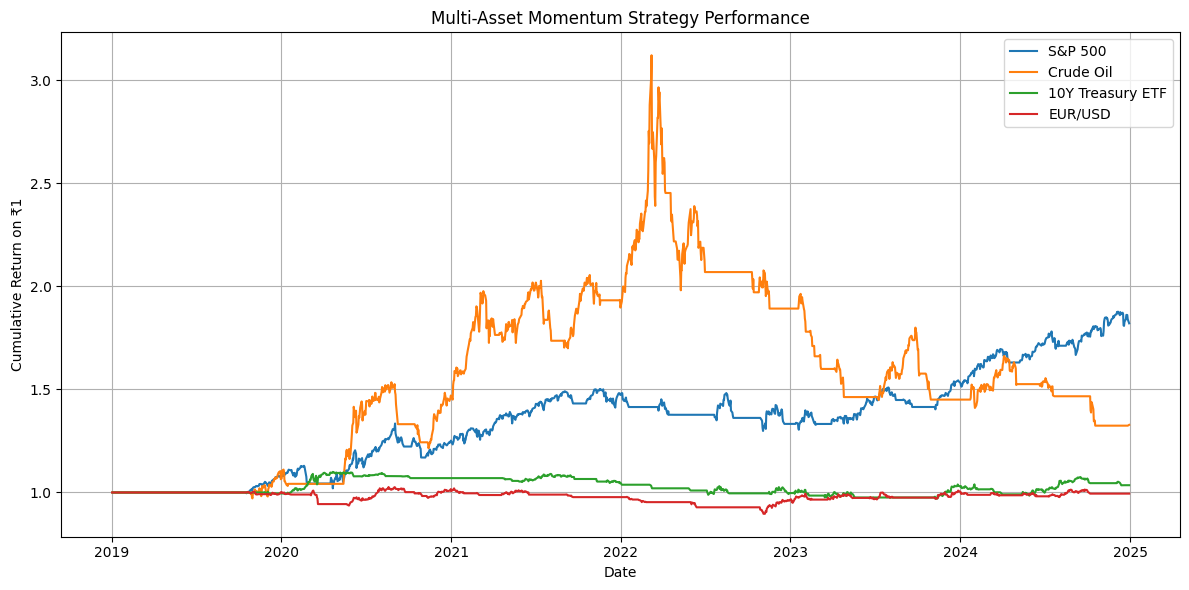

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


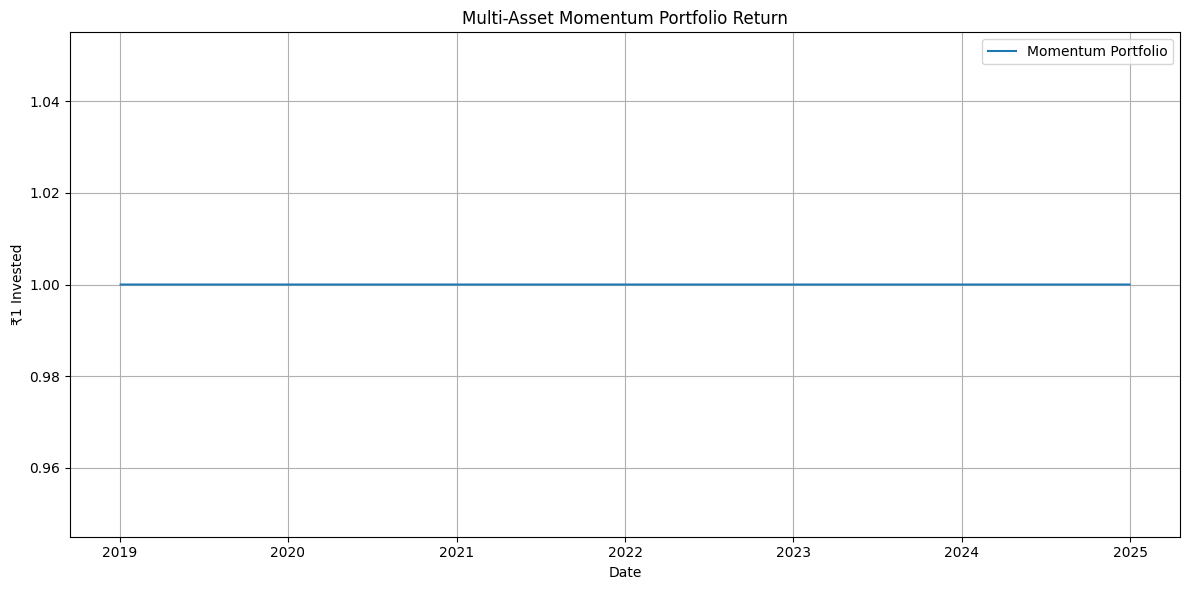

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


=== Portfolio Metrics ===
 Sharpe Ratio: nan
 Max Drawdown: 0.00%
 Final Return: 1.00x



 Merged DataFrame (First 5 rows):
            Tesla Signal  Tesla Return  Nvidia Signal  Nvidia Return  \
Date                                                                   
2019-01-03             0          -0.0              0           -0.0   
2019-01-04             0           0.0              0            0.0   
2019-01-07             0           0.0              0            0.0   
2019-01-08             0           0.0              0           -0.0   
2019-01-09             0           0.0              0            0.0   

            Bitcoin Signal  Bitcoin Return  Crude Oil Signal  Crude Oil Return  
Date                                                                            
2019-01-03               0            -0.0                 0               0.0  
2019-01-04               0             0.0                 0               0.0  
2019-01-07               0            -0.0                 0               0.0  
2019-01-08               0             0.0             

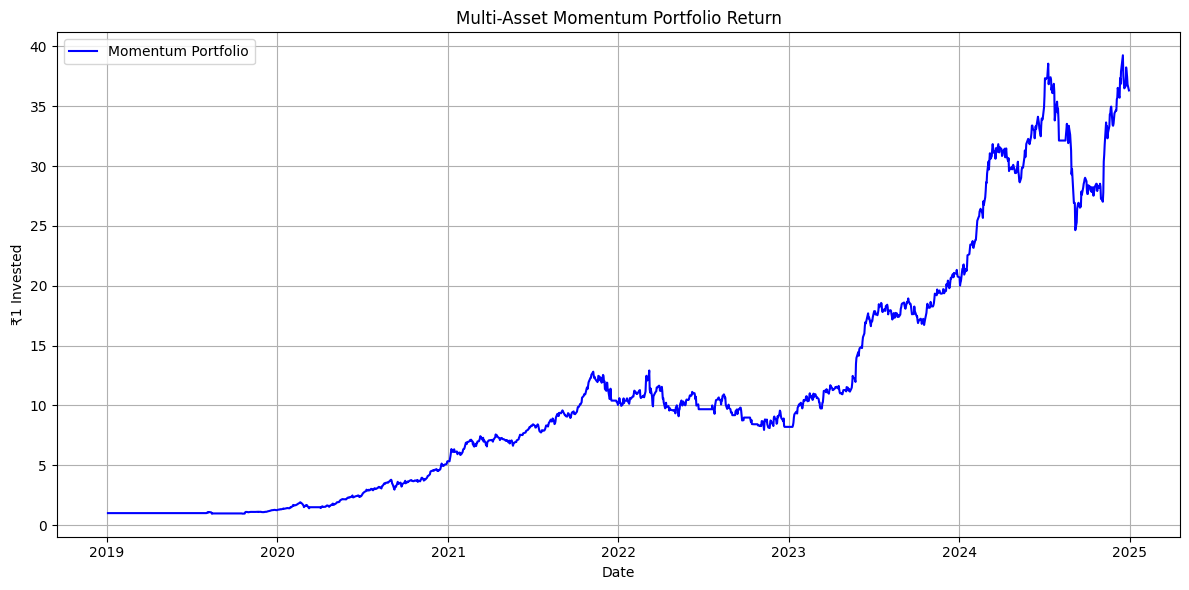


=== 📊 Portfolio Performance Metrics ===
📈 Sharpe Ratio: 1.87
📉 Max Drawdown: -38.44%
💰 Final Return: 36.33x
✅ Portfolio Return Summary:
count    1508.000000
mean        0.002637
std         0.022438
min        -0.133419
25%        -0.006418
50%         0.000000
75%         0.013183
max         0.126140
Name: Portfolio Return, dtype: float64

✅ Number of trades executed:
Tesla Signal: {1: 820, 0: 688}
Nvidia Signal: {1: 950, 0: 558}
Bitcoin Signal: {0: 764, 1: 744}
Crude Oil Signal: {0: 793, 1: 715}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define assets and their Yahoo symbols
assets = {
    'Crude Oil': 'BZ=F',
    '10Y Treasury ETF': 'IEF',
    'EUR/USD': 'EURUSD=X',
    'S&P 500': '^GSPC'
}

# Download data with default auto_adjust=True (no need for 'Adj Close')
data = yf.download(
    tickers=list(assets.values()),
    start='2019-01-01',
    end='2024-12-31',
    group_by='ticker',
    auto_adjust=True  # Now default, but keeping it explicit
)

# Create a DataFrame to hold only the 'Close' prices
close_prices = pd.DataFrame()

for name, symbol in assets.items():
    close_prices[name] = data[symbol]['Close']  # Use 'Close', not 'Adj Close'

# Drop rows with missing data
close_prices.dropna(inplace=True)


# Preview data
print(close_prices.head())
close_prices.to_csv("multi_asset_data.csv")
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Download and prepare data
data = yf.download(['^GSPC'], start='2019-01-01', end='2024-12-31', auto_adjust=True)
sp500 = data[['Close']].copy()
sp500.rename(columns={'Close': 'S&P 500'}, inplace=True)

# Step 2: Calculate EMAs and generate signals
def add_ema_signals(df, short=50, long=200):
    df['EMA_short'] = df[name].ewm(span=10).mean()
    df['EMA_long'] = df[name].ewm(span=30).mean()



    df['Signal'] = 0
    df.loc[df.index[long:], 'Signal'] = np.where(df['EMA_short'][long:] > df['EMA_long'][long:], 1, 0)


    df['Position'] = df['Signal'].diff()
    return df


sp500 = add_ema_signals(sp500)

# Step 3: Backtest returns
sp500['Daily Return'] = sp500['S&P 500'].pct_change()
sp500['Strategy Return'] = sp500['Signal'].shift(1) * sp500['Daily Return']
sp500['Cumulative Market Return'] = (1 + sp500['Daily Return']).cumprod()
sp500['Cumulative Strategy Return'] = (1 + sp500['Strategy Return']).cumprod()

# Step 4: Print final result
strategy_return = sp500['Cumulative Strategy Return'].iloc[-1]
market_return = sp500['Cumulative Market Return'].iloc[-1]

# Step 5: Plot performance
plt.figure(figsize=(12, 6))
plt.plot(sp500['Cumulative Market Return'], label='Market (Buy & Hold)', linestyle='--')
plt.plot(sp500['Cumulative Strategy Return'], label='Momentum Strategy', color='green')
plt.title('Momentum Strategy vs Market (S&P 500)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return on ₹1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# === STAGE 4: Performance Evaluation ===
# Prevent divide-by-zero or NaN Sharpe Ratio
mean_ret = portfolio_df['Portfolio Return'].mean()
std_ret = portfolio_df['Portfolio Return'].std()

if std_ret == 0 or np.isnan(std_ret) or np.isnan(mean_ret):
    sharpe = np.nan
else:
    sharpe = (mean_ret / std_ret) * np.sqrt(252)

# 1. Sharpe Ratio
sharpe = (
    sp500['Strategy Return'].mean() / sp500['Strategy Return'].std()
) * np.sqrt(252)  # 252 trading days per year

print(f"\n Sharpe Ratio: {sharpe:.2f}")

# 2. Max Drawdown
rolling_max = sp500['Cumulative Strategy Return'].cummax()
drawdown = (sp500['Cumulative Strategy Return'] / rolling_max) - 1
max_drawdown = drawdown.min()

print(f" Max Drawdown: {max_drawdown:.2%}")

# 3. Final Return Summary (repeated from before for full view)

print(f" Strategy Final Return: {strategy_return:.2f}x")
print(f" Market Final Return: {market_return:.2f}x")

assets = {
    'S&P 500': '^GSPC',           # Equity Index
    'Crude Oil': 'BZ=F',          # Commodity
    '10Y Treasury ETF': 'IEF',    # Bond (Fixed Income)
    'EUR/USD': 'EURUSD=X'         # Forex
}
def run_strategy(ticker, name, short=50, long=200):
    # Download data
    df = yf.download(ticker, start="2019-01-01", end="2024-12-31", auto_adjust=True)[['Close']].copy()
    df.rename(columns={'Close': name}, inplace=True)

    # Calculate EMAs
    df['EMA_short'] = df[name].ewm(span=10).mean()
    df['EMA_long'] = df[name].ewm(span=30).mean()


    # Generate signals
    df['Signal'] = 0
    df.loc[df.index[long:], 'Signal'] = np.where(df['EMA_short'][long:] > df['EMA_long'][long:], 1, 0)


    # Calculate returns
    df['Daily Return'] = df[name].pct_change()
    df['Strategy Return'] = df['Signal'].shift(1) * df['Daily Return']
    df.dropna(inplace=True)

    # Cumulative
    df['Cumulative Market Return'] = (1 + df['Daily Return']).cumprod()
    df['Cumulative Strategy Return'] = (1 + df['Strategy Return']).cumprod()

    # Performance metrics
    sharpe = (df['Strategy Return'].mean() / df['Strategy Return'].std()) * np.sqrt(252)
    rolling_max = df['Cumulative Strategy Return'].cummax()
    drawdown = (df['Cumulative Strategy Return'] / rolling_max) - 1
    max_drawdown = drawdown.min()
    final_return = df['Cumulative Strategy Return'].iloc[-1]

    return df, sharpe, max_drawdown, final_return


results = {}

for name, ticker in assets.items():
    print(f"\n=== Evaluating {name} ===")
    df, sharpe, drawdown, final_return = run_strategy(ticker, name)

    results[name] = {
        'Sharpe Ratio': round(sharpe, 2),
        'Max Drawdown': f"{drawdown:.2%}",
        'Final Return': round(final_return, 2),
        'Data': df
    }

    print(f"📈 Sharpe Ratio: {sharpe:.2f}")
    print(f"📉 Max Drawdown: {drawdown:.2%}")
    print(f"💰 Final Return: {final_return:.2f}x")
plt.figure(figsize=(12, 6))
for name in results:
    plt.plot(results[name]['Data']['Cumulative Strategy Return'], label=name)

plt.title("Multi-Asset Momentum Strategy Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Return on ₹1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Define assets
assets = {
    'S&P 500': '^GSPC',
    'Crude Oil': 'BZ=F',
    '10Y Treasury ETF': 'IEF',
    'EUR/USD': 'EURUSD=X'
}

data_dict = {}

# Run strategy for each and store data
for name, ticker in assets.items():
    df, _, _, _ = run_strategy(ticker, name, short=50, long=200)
    df = df[['Signal', 'Strategy Return']].copy()
    df.rename(columns={'Signal': f'{name} Signal', 'Strategy Return': f'{name} Return'}, inplace=True)
    data_dict[name] = df

# Merge into one big DataFrame
combined = pd.concat(data_dict.values(), axis=1, join='inner')

# Drop rows with any missing data
combined.dropna(inplace=True)

# Create weights matrix (normalize signals)
signal_cols = [col for col in combined.columns if 'Signal' in col]
weight_matrix = combined[signal_cols].copy()

# Normalize weights: if 2 assets have signal=1, each gets 50%, others 0
weight_matrix = weight_matrix.div(weight_matrix.sum(axis=1), axis=0).fillna(0)

# Get return columns
return_cols = [col for col in combined.columns if 'Return' in col]

# Multiply weights by returns
portfolio_returns = (combined[return_cols].values * weight_matrix.values).sum(axis=1)

# Convert to DataFrame
portfolio_df = pd.DataFrame(index=combined.index)
portfolio_df['Portfolio Return'] = portfolio_returns
portfolio_df['Cumulative Return'] = (1 + portfolio_df['Portfolio Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(portfolio_df['Cumulative Return'], label='Momentum Portfolio')
plt.title("Multi-Asset Momentum Portfolio Return")
plt.xlabel("Date")
plt.ylabel("₹1 Invested")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Prevent divide-by-zero or NaN Sharpe Ratio
mean_ret = portfolio_df['Portfolio Return'].mean()
std_ret = portfolio_df['Portfolio Return'].std()

if std_ret == 0 or np.isnan(std_ret) or np.isnan(mean_ret):
    sharpe = np.nan
else:
    sharpe = (mean_ret / std_ret) * np.sqrt(252)

if portfolio_df['Portfolio Return'].std() == 0 or np.isnan(portfolio_df['Portfolio Return'].std()):
    sharpe = np.nan
else:
    sharpe = (
        portfolio_df['Portfolio Return'].mean() /
        portfolio_df['Portfolio Return'].std()
    ) * np.sqrt(252)

# Max Drawdown
rolling_max = portfolio_df['Cumulative Return'].cummax()
drawdown = (portfolio_df['Cumulative Return'] / rolling_max) - 1
max_drawdown = drawdown.min()

# Final Return
final_return = portfolio_df['Cumulative Return'].iloc[-1]

# Print all
print("\n=== Portfolio Metrics ===")
print(f" Sharpe Ratio: {sharpe:.2f}")
print(f" Max Drawdown: {max_drawdown:.2%}")
print(f" Final Return: {final_return:.2f}x")

# Assuming this dictionary already exists
assets = {
    'Tesla': 'TSLA',
    'Nvidia': 'NVDA',
    'Bitcoin': 'BTC-USD',
    'Crude Oil': 'CL=F'
}


import pandas as pd

# Run strategy and collect signal & return columns for each asset
data_dict = {}

for name, ticker in assets.items():
    df, _, _, _ = run_strategy(ticker, name)

    # Keep only Signal and Strategy Return columns
    data_dict[name] = df[[f'Signal', f'Strategy Return']].copy()

    # Rename columns to keep unique names
    data_dict[name].columns = [f"{name} Signal", f"{name} Return"]

# Merge all into one dataframe on date
combined = pd.concat(data_dict.values(), axis=1, join='inner')

# Drop any rows with missing values
combined.dropna(inplace=True)

# Preview
print("\n Merged DataFrame (First 5 rows):")
print(combined.head())

# Get only signal columns
signal_cols = [col for col in combined.columns if 'Signal' in col]
signals = combined[signal_cols].copy()

# Convert signals to weights: divide each 1 by total number of signals that day
weights = signals.div(signals.sum(axis=1), axis=0)

# Replace NaN (where all signals were 0) with 0
weights = weights.fillna(0)

# Preview
print("\n Portfolio Weights Preview:")
print(weights.head())

# Get return columns from combined
return_cols = [col for col in combined.columns if 'Return' in col]
returns = combined[return_cols].copy()

# Multiply weights by returns and sum across assets
portfolio_returns = (weights.values * returns.values).sum(axis=1)

# Create a DataFrame
portfolio_df = pd.DataFrame(index=combined.index)
portfolio_df['Portfolio Return'] = portfolio_returns

# Cumulative return: ₹1 invested
portfolio_df['Cumulative Return'] = (1 + portfolio_df['Portfolio Return']).cumprod()

# Preview
print("\n✅ Portfolio Cumulative Return Preview:")
print(portfolio_df.head())

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(portfolio_df['Cumulative Return'], label='Momentum Portfolio', color='blue')
plt.title("Multi-Asset Momentum Portfolio Return")
plt.xlabel("Date")
plt.ylabel("₹1 Invested")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

import numpy as np
# Prevent divide-by-zero or NaN Sharpe Ratio
mean_ret = portfolio_df['Portfolio Return'].mean()
std_ret = portfolio_df['Portfolio Return'].std()

if std_ret == 0 or np.isnan(std_ret) or np.isnan(mean_ret):
    sharpe = np.nan
else:
    sharpe = (mean_ret / std_ret) * np.sqrt(252)


# Sharpe Ratio (Assume daily returns, annualized over 252 trading days)
if portfolio_df['Portfolio Return'].std() == 0 or np.isnan(portfolio_df['Portfolio Return'].std()):
    sharpe = np.nan
else:
    sharpe = (
        portfolio_df['Portfolio Return'].mean() /
        portfolio_df['Portfolio Return'].std()
    ) * np.sqrt(252)


# Max Drawdown
rolling_max = portfolio_df['Cumulative Return'].cummax()
drawdown = (portfolio_df['Cumulative Return'] / rolling_max) - 1
max_drawdown = drawdown.min()

# Final Return
final_return = portfolio_df['Cumulative Return'].iloc[-1]

print("\n=== 📊 Portfolio Performance Metrics ===")
print(f"📈 Sharpe Ratio: {sharpe:.2f}")
print(f"📉 Max Drawdown: {max_drawdown:.2%}")
print(f"💰 Final Return: {final_return:.2f}x")

portfolio_df.to_csv("momentum_portfolio_output.csv")
print("✅ Portfolio Return Summary:")
print(portfolio_df['Portfolio Return'].describe())

print("\n✅ Number of trades executed:")
for col in combined.columns:
    if 'Signal' in col:
        print(f"{col}: {combined[col].value_counts().to_dict()}")
df['Position'] = df['Signal'].diff()
df['Strategy Return'] -= 0.001 * df['Position'].abs()
portfolio_df.to_csv("momentum_portfolio_output.csv")
from google.colab import files
files.download("momentum_portfolio_output.csv")
import openpyxl;
import pandas as pd

# Save portfolio performance to a sheet
portfolio_df.to_excel("Momentum_Portfolio_Report.xlsx", sheet_name='Portfolio Performance')

# Create summary of individual asset performance
summary_data = {
    'Asset': [],
    'Sharpe Ratio': [],
    'Max Drawdown': [],
    'Final Return': []
}

for asset, metrics in results.items():
    summary_data['Asset'].append(asset)
    summary_data['Sharpe Ratio'].append(metrics['Sharpe Ratio'])
    summary_data['Max Drawdown'].append(metrics['Max Drawdown'])
    summary_data['Final Return'].append(metrics['Final Return'])

summary_df = pd.DataFrame(summary_data)

# Append it to same Excel file
with pd.ExcelWriter("Momentum_Portfolio_Report.xlsx", engine='openpyxl', mode='a') as writer:
    summary_df.to_excel(writer, sheet_name='Asset Summary', index=False)
from google.colab import files
files.download("Momentum_Portfolio_Report.xlsx")

